In [23]:
import keras
import numpy as np

In [24]:
NUM_WORDS = 10_000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(
    num_words=NUM_WORDS
)


In [25]:
# What are the types of the train and test data?
type(train_data), type(test_data)

(numpy.ndarray, numpy.ndarray)

In [26]:
train_data.dtype # objects

dtype('O')

In [27]:
# Check size of train and test data
train_data.shape, test_data.shape

((25000,), (25000,))

In [28]:
train_labels.shape

(25000,)

In [29]:
# Features of first example
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [30]:
len(train_data[0]), len(train_data[1])
# Reviews don't have the same length!

(218, 189)

In [31]:
def convert_to_english ( list_of_integers ):
  word_index = keras. datasets .imdb. get_word_index ()
  # reverse the word index
  rv_word_index = {idx : word for (word , idx) in word_index .items () }
  # map each integer to a word and join all words together
  # Index 0, 1 and 2 are reserved for 'padding ', 'start of sequence ' & 'unknown '
  return " ".join( rv_word_index .get(idx - 3, "?") for idx in list_of_integers )

In [32]:
convert_to_english(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [33]:
convert_to_english(train_data[1])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## 2.2 Convert the data

In [34]:
# Review woorden: [3, 5, 4, 5]
# 10 woorden (0 tem 9)
# Omgezet via multi hot encoding: [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
# Volgorde en aantallen vallen weg!
# Review 2 woorden [3, 4, 5] geeft zelfde encoding

In [35]:
def convert_to_multi_hot(sequences, dimension):
  # Create numpy array of the correct shape and data type filled with zeros.
  output = np.zeros(shape=(sequences.shape[0], dimension), dtype=np.float32)

  # Mark words
  for idx, sequence in enumerate(sequences):
    output[idx, sequence] = 1

  return output

In [36]:
# Convert features
X_train = convert_to_multi_hot(train_data, dimension=NUM_WORDS)
X_test = convert_to_multi_hot(test_data, dimension=NUM_WORDS)

# Rename labels
y_train = train_labels
y_test = test_labels

In [37]:
X_train.shape

(25000, 10000)

In [38]:
X_train[0, :50]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

In [39]:
# Validation data
X_val = X_test[:10_000]
y_val = y_test[:10_000]

# Test data
X_test = X_test[10_000:]
y_test = y_test[10_000:]

In [40]:
print(X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(10000, 10000) (10000,) (15000, 10000) (15000,)


## 2.3 Build a model

In [41]:
def get_model():
  model = keras.models.Sequential()

  # Layers
  model.add(keras.layers.Input(shape=(NUM_WORDS, ), name="input_laag")) # not mandatory but it helps to get a model summary (param # has values)
  model.add(keras.layers.Dense(units=16, activation="relu", name="hidden_1"))
  model.add(keras.layers.Dense(units=16, activation="relu", name="hidden_2"))
  model.add(keras.layers.Dense(units=1, activation="sigmoid", name="output"))

  # 1 output unit -> binaire class = yes/no output
  # Activation function: logistic

  return model

In [42]:
model = get_model()

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Typische examenvraag**: van waar komt het aantal parameters?

160,016 parameters?


*   Input laag: 10,000 neuronen
*   Verbonden met 16 neuronen -> 16,000 neuronen
*   Elke neuron op laag heeft nog een bias -> 16 biases -> 16,016 parameters

Tweede laag: 16 * 16 + 16 = 272

Derde lag: 16 * 1 + 1 = 17

## 2.4 Compile model

In [44]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy", # wordt niet meegegeven in examen opgave
    metrics=["accuracy"]
)

## 2.5 Train model

In [45]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8277 - loss: 0.4153 - val_accuracy: 0.8801 - val_loss: 0.2913
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9212 - loss: 0.2074 - val_accuracy: 0.8812 - val_loss: 0.2962
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9387 - loss: 0.1697 - val_accuracy: 0.8769 - val_loss: 0.3257
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9452 - loss: 0.1524 - val_accuracy: 0.8745 - val_loss: 0.3429
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9560 - loss: 0.1285 - val_accuracy: 0.8713 - val_loss: 0.3625
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9617 - loss: 0.1123 - val_accuracy: 0.8660 - val_loss: 0.3963
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9680 - loss: 0.0950 - val_accuracy: 0.8647 - val_loss: 0.4394
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9754 - loss: 0.0758 - val_accuracy: 0.

Accuracy gaat omhoog maar validatie accuracy zakt en validatie loss stijgt

=> wijst op **overfitting**

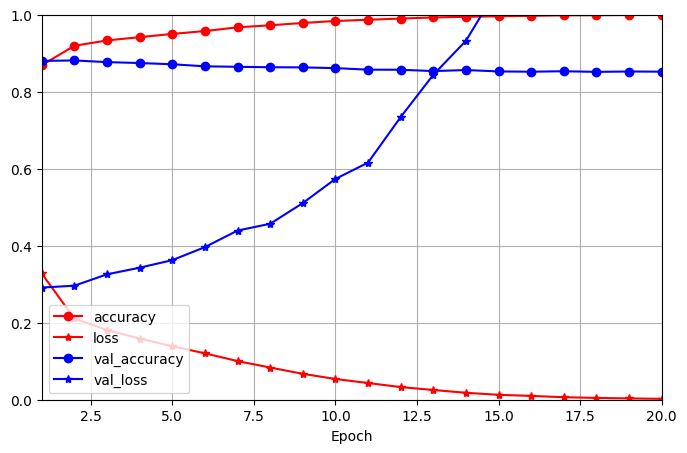

In [48]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
  plt.figure(figsize =(8, 5))
  for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
    epochs = np.array(history.epoch)
    plt.plot(epochs + 1, history.history[key], style , label=key)

  plt.xlabel("Epoch")
  plt.axis ([1, len(history.history['loss']), 0., 1])
  plt.legend(loc="lower left")
  plt.grid ()

plot_learning_curves(history)

In [49]:
model = get_model()
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=2
)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8297 - loss: 0.3950 - val_accuracy: 0.8778 - val_loss: 0.3006
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9248 - loss: 0.1998 - val_accuracy: 0.8726 - val_loss: 0.3184


## 2.6 Evaluate the model

In [51]:
model.evaluate(X_test, y_test, verbose=False)

[0.3132186830043793, 0.8772000074386597]

In [52]:
model.evaluate(X_val, y_val, verbose=False)

[0.3183525800704956, 0.8726000189781189]

In [53]:
model.evaluate(X_train, y_train, verbose=False)

[0.16352492570877075, 0.9416800141334534]